# CGNN Example on the LUCAS (LUng CAncer Simple set) dataset 

Source : www.causality.inf.ethz.ch/data/LUCAS.html

The true dataset is the **lucas0_train.csv** file ; we use the **NUM_LUCAS.csv** file, representing a graph with continuous data which structure is the same as the true LUCAS dataset.
**Goal** : Find the causal structure of the graph using CGNN, starting from the raw data.

In [1]:
#Import libraries
import cdt 
# A warning on R libraries might occur. It is for the use of the r libraries that could be imported into the framework
import numpy as np
import pandas as pd

#Hardware parameters
cdt.SETTINGS.GPU = True
cdt.SETTINGS.NB_GPU = 4
cdt.SETTINGS.NB_JOBS = 8

#Settings for CGNN
cdt.CGNN_SETTINGS.use_Fast_MMD = False
cdt.CGNN_SETTINGS.NB_RUNS = 8
cdt.CGNN_SETTINGS.NB_MAX_RUNS = 16

#Settings for Feature Selection
cdt.CGNN_SETTINGS.nb_run_feature_selection = 16
cdt.CGNN_SETTINGS.regul_param = 0.004
cdt.CGNN_SETTINGS.threshold_UMG = 0.13     

/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Error in loadNamespace(name) : there is no package called ‘minet’

  warnings.warn(x, RRuntimeWarning)
/home/diviyan/phd/CausalDiscoveryToolbox/cdt/utils/R.py:34: UserWarning: R wrapper is not available : Error in loadNamespace(name) : there is no package called ‘minet’

  warnings.warn("R wrapper is not available : {}".format(e))


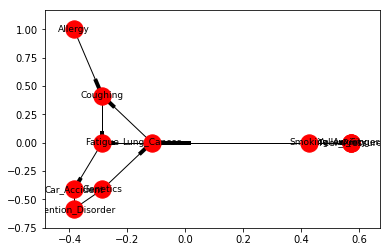

,Allergy,Anxiety,Genetics,Peer_Pressure,Attention_Disorder,Smoking,Lung_Cancer,Yellow_Fingers,Coughing,Fatigue,Car_Accident
0,-0.266076,0.460788,-0.359440,-0.403187,-0.228317,1.334455,0.574623,1.163336,0.982726,-0.840672,-0.508322
1,-0.579084,-0.846836,-0.295204,0.302683,-0.256269,-1.637193,-1.395067,0.154516,0.341314,0.933638,-1.075662
2,-0.105876,0.603170,-0.246007,-0.066926,-0.100983,0.500359,0.329122,0.199425,0.314847,-0.143226,-0.755328
3,0.727293,-0.949493,0.749637,-0.595794,0.809405,-0.586919,-0.130269,-0.840610,-0.691177,0.303761,-0.431910
4,-0.175018,-0.820478,-0.432949,-0.729511,-0.753609,-0.219810,-0.700120,-0.733240,-0.149308,0.854195,-0.633940


In [7]:
# Load data and graph solution
data = pd.read_csv("NUM_LUCAS.csv")
solution = cdt.DirectedGraph(pd.read_csv("Lucas_graph.csv"))  
solution.plot() # The plot function allows for quick visualization of the graph. 
# For a more detailed view of the network, please use the .to_list() function to export the graph to another format  
# importable by other libraries (graphviz, gephi).
data.head()

In [ ]:
# Finding the structure of the graph
from cdt.independence.graph import FSGNN
Fsgnn = FSGNN()
ugraph = Fsgnn.create_skeleton_from_data(data)
ugraph.plot()

In [ ]:
# Orient the edges of the graph
from cdt.causality.pairwise import CGNN
Cgnn = CGNN(backend="TensorFlow")
dgraph = Cgnn.predict(data, graph=ugraph)

# Plot the output graph
dgraph.plot()

# Data can be generated using the graph output, with the method CGNN_generator_tf from cdt.generators.generators